In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

In [10]:
column_measurement = inspector.get_columns('measurement')
column_measurement

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [11]:
column_station = inspector.get_columns('station')
column_station

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

# Exploratory Climate Analysis

In [12]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [13]:
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year

datetime.date(2016, 8, 23)

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#results = session.query(Measurement.prcp,Measurement.date).order_by(Measurement.date.desc()).all()

In [15]:
#Measurement of precipiation 12 months prior
result1 = session.query(Measurement.prcp,Measurement.date).\
    filter(Measurement.date < '2017-08-23').filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

# Calculate the date 1 year ago from the last data point in the database
precipitation = [result[0] for result in result1]
date = [result[1] for result in result1]

# Use Pandas Plotting with Matplotlib to plot the data
result1

[(0.08, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.28, '2016-08-24'),
 (None, '2016-08-24'),
 (1.22, '2016-08-24'),
 (2.15, '2016-08-24'),
 (1.45, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.21, '2016-08-25'),
 (0.06, '2016-08-25'),
 (0.11, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.03, '2016-08-26'),
 (0.02, '2016-08-26'),
 (0.04, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.01, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.18, '2016-08-27'),
 (0.02, '2016-08-27'),
 (0.0, '2016-08-27'),
 (0.12, '2016-08-27'),
 (None, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.6, '2016-08-28'),
 (2.07, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.17, '2016-08-29'),
 (0.04, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),
 (0.35, '2016-08-29'),
 (0.9, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.02, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (

In [16]:
precipitation

[0.08,
 2.15,
 2.28,
 None,
 1.22,
 2.15,
 1.45,
 0.08,
 0.08,
 0.0,
 0.0,
 0.21,
 0.06,
 0.11,
 0.0,
 0.03,
 0.02,
 0.04,
 0.0,
 0.01,
 0.0,
 0.18,
 0.02,
 0.0,
 0.12,
 None,
 0.01,
 0.14,
 0.14,
 0.14,
 0.6,
 2.07,
 0.0,
 0.17,
 0.04,
 None,
 0.0,
 0.35,
 0.9,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 0.05,
 0.13,
 0.1,
 None,
 None,
 0.25,
 0.24,
 2.46,
 0.0,
 0.0,
 0.0,
 None,
 0.02,
 0.01,
 0.0,
 0.02,
 0.19,
 None,
 None,
 0.01,
 0.03,
 0.0,
 0.07,
 0.08,
 0.12,
 1.0,
 0.03,
 0.03,
 0.74,
 0.14,
 0.44,
 None,
 0.11,
 None,
 0.02,
 0.03,
 0.18,
 None,
 0.05,
 0.04,
 0.03,
 0.11,
 1.0,
 0.05,
 0.1,
 0.23,
 0.11,
 0.16,
 1.35,
 0.0,
 0.22,
 0.01,
 None,
 0.01,
 0.07,
 0.15,
 0.03,
 0.01,
 0.29,
 None,
 0.23,
 0.16,
 0.35,
 0.0,
 0.01,
 0.14,
 0.09,
 1.16,
 0.05,
 0.18,
 0.12,
 0.3,
 0.6,
 0.0,
 0.04,
 None,
 None,
 0.15,
 0.31,
 1.04,
 0.02,
 0.37,
 0.32,
 None,
 0.46,
 0.34,
 1.2,
 1.32,
 0.9,
 1.84,
 None,
 1.19,
 2.33,
 6.7,
 0.42,
 0.12,
 0.07,
 None,
 0.17,
 0.83,
 3.35,
 0.06,
 0.01,
 0

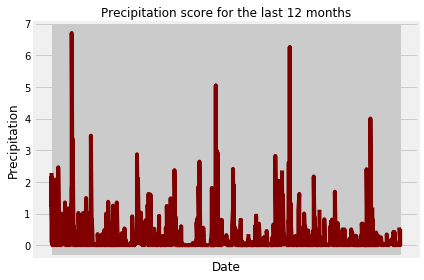

In [17]:
plt.plot(date, precipitation, color='maroon')
plt.title("Precipitation score for the last 12 months",fontsize=12)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Precipitation",fontsize=12)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tight_layout()
plt.savefig("Precipitation scores for the last 12 months.png")
plt.show()

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(result1, columns=['Precipitation', 'Date'])
df.set_index('Date', inplace=True)
df.to_csv("Precipation data in the last 12 months.csv")

In [19]:
df.head(10)

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
stat = df.describe()
stat.to_csv("Precipitation statistic for the last 12 months.csv")

In [21]:
stat

,Precipitation
count,2011.000000
mean,0.176549
std,0.460667
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Measurement.station).distinct().\
    order_by(Measurement.station).all()
stations

[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_result = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_result

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
station_activity_df = pd.DataFrame(station_result, columns = ["Station", "Count of Measurement"])
station_activity_df.set_index('Station', inplace=True)
station_activity_df.to_csv("Station Activity.csv")

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, average temperature of the most active station (in a tupple)
USC00519281 = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
USC00519397 = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519397').all()
USC00513117 = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00513117').all()
USC00519523 = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519523').all()
USC00516128 = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00516128').all()
USC00514830 = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00514830').all()
USC00511918 = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00511918').all()
USC00517948 = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00517948').all()
USC00518838 = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00518838').all()
#station with most activities - min, max, avg tobs
print(USC00519281)

[(54.0, 85.0, 71.66378066378067)]


In [26]:
print(USC00519397)
print(USC00513117)
print(USC00519523)
print(USC00516128)
print(USC00514830)
print(USC00511918)
print(USC00517948)
print(USC00518838)



[(56.0, 87.0, 74.55323054331865)]
[(59.0, 85.0, 72.68918420081211)]
[(56.0, 85.0, 74.5436493068565)]
[(58.0, 84.0, 70.91500765696784)]
[(58.0, 85.0, 74.8732970027248)]
[(53.0, 87.0, 71.61596766043456)]
[(58.0, 87.0, 74.68440233236151)]
[(58.0, 83.0, 72.72407045009784)]


In [27]:
result2 = session.query(Measurement.tobs, Measurement.date).\
    filter(Measurement.station =='USC00519281').\
    filter(Measurement.date < '2017-08-23').filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

# Calculate the date 1 year ago from the last data point in the database

result2

[(77.0, '2016-08-24'),
 (80.0, '2016-08-25'),
 (80.0, '2016-08-26'),
 (75.0, '2016-08-27'),
 (73.0, '2016-08-28'),
 (78.0, '2016-08-29'),
 (77.0, '2016-08-30'),
 (78.0, '2016-08-31'),
 (80.0, '2016-09-01'),
 (80.0, '2016-09-02'),
 (78.0, '2016-09-03'),
 (78.0, '2016-09-04'),
 (78.0, '2016-09-05'),
 (73.0, '2016-09-06'),
 (74.0, '2016-09-07'),
 (80.0, '2016-09-08'),
 (79.0, '2016-09-09'),
 (77.0, '2016-09-10'),
 (80.0, '2016-09-11'),
 (76.0, '2016-09-12'),
 (79.0, '2016-09-13'),
 (75.0, '2016-09-14'),
 (79.0, '2016-09-15'),
 (78.0, '2016-09-16'),
 (79.0, '2016-09-17'),
 (78.0, '2016-09-18'),
 (78.0, '2016-09-19'),
 (76.0, '2016-09-20'),
 (74.0, '2016-09-21'),
 (77.0, '2016-09-22'),
 (78.0, '2016-09-23'),
 (79.0, '2016-09-24'),
 (79.0, '2016-09-25'),
 (77.0, '2016-09-26'),
 (80.0, '2016-09-27'),
 (78.0, '2016-09-28'),
 (78.0, '2016-09-29'),
 (78.0, '2016-09-30'),
 (77.0, '2016-10-01'),
 (79.0, '2016-10-02'),
 (79.0, '2016-10-03'),
 (79.0, '2016-10-04'),
 (79.0, '2016-10-05'),
 (75.0, '20

In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = [result[0] for result in result2]
temp


[77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,
 69.0,

Text(0, 0.5, 'Frequency')

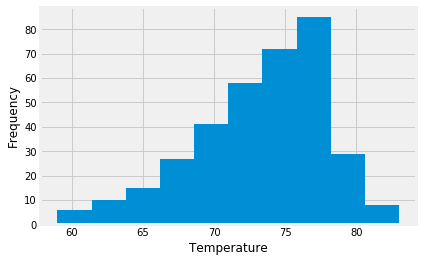

In [38]:
plt.hist(temp)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

![precipitation](Images/station-histogram.png)

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [98]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
tmin, tavg, tmax = calc_temps('2016-08-13','2016-08-23')[0]
tmin

72.0

In [80]:
my_trip = session.query(func.avg(Measurement.tobs),Measurement.date).\
    group_by(Measurement.date).filter(Measurement.date <= '2016-08-23').filter(Measurement.date >= '2016-08-13').\
    order_by(Measurement.date).all()

trip_temp = [result[0] for result in my_trip]
trip_date = [result[1] for result in my_trip]

In [81]:
my_trip

[(79.0, '2016-08-13'),
 (77.2, '2016-08-14'),
 (77.71428571428571, '2016-08-15'),
 (77.85714285714286, '2016-08-16'),
 (78.28571428571429, '2016-08-17'),
 (78.85714285714286, '2016-08-18'),
 (77.5, '2016-08-19'),
 (79.66666666666667, '2016-08-20'),
 (77.0, '2016-08-21'),
 (77.28571428571429, '2016-08-22'),
 (78.28571428571429, '2016-08-23')]

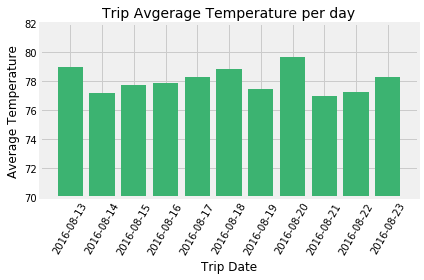

In [112]:

# Plot the results from your previous query as a bar chart. 
plt.bar(trip_date, trip_temp, color= 'mediumseagreen')
plt.title("Trip Avgerage Temperature per day",fontsize=14)
plt.xlabel("Trip Date",fontsize=12)
plt.ylabel("Average Temperature",fontsize=12)
plt.ylim(70, 82) 
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelrotation=60 )
#plt.errorbar(tmin, tmax, ecolor='black')
plt.tight_layout()



/Users/anbui/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


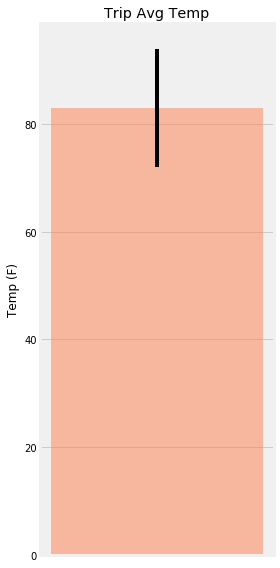

In [113]:
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

yerr = tmax - tmin

xpos = 1
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
bar = ax.bar(xpos, tmax, yerr=yerr, alpha=0.5, color='coral', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")

# fig.autofmt_xdate()
fig.tight_layout()
fig.show()

In [33]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [34]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [116]:
# calculate the daily normals for your trip
my_trip_normal = session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs),func.strftime("%m-%d", Measurement.date)).\
    group_by(Measurement.date).filter(Measurement.date<= '2016-08-23').filter(Measurement.date>= '2016-08-13').\
    order_by(Measurement.date).all()

trip_tmin = [result[0] for result in my_trip_normal]
trip_tavg = [result[1] for result in my_trip_normal]
trip_tmax = [result[2] for result in my_trip_normal]
trip_date = [result[3] for result in my_trip_normal]

# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [120]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
mytrip_df = pd.DataFrame({
    "My Trip Date": trip_date,
    "Min Temp ": trip_tmin,
    "Avg Temp":trip_tavg,
    "Max Temp": trip_tmax
})
mytrip_df.set_index('My Trip Date', inplace=True)

In [37]:
# Plot the daily normals as an area plot with `stacked=False`
